# Steps import data



In [ ]:
pip install openpyxl

In [ ]:
nltk.download('punkt')

In [ ]:

pip install sklearn

In [ ]:
pip install textblob


In [ ]:
pip install tensorflow

In [9]:

import pandas as pd
from textblob import TextBlob
import nltk
import re
import pandas as pd
import numpy as np
import string
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [11]:
df_train=pd.read_excel("tweets.xlsx",index_col=0,header=None)
df_test=pd.read_excel("test.xlsx",index_col=0,header=None)
# df_positive_words=pd.read_excel("positive.xlsx",index_col=0,header=None)


In [12]:

df_train.head()

1   2   \
0                                                                            
Tweet Id                                                          Text NaN   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN... NaN   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo... NaN   
1374481774714126338  RT @Fogdo : Thank you @Tesla for this helpful ... NaN   
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi007 o... NaN   

                        3            4                         5   \
0                                                                   
Tweet Id              Name  Screen Name                       UTC   
1377618168705859585  Tesla        Tesla  2021-04-01T13:45:40.000Z   
1375118425362628613  Tesla        Tesla  2021-03-25T16:12:35.000Z   
1374481774714126338  Tesla        Tesla  2021-03-23T22:02:46.000Z   
1371884988371771399  Tesla        Tesla  2021-03-16T18:04:04.000Z   

                                                 6          7         8   \
0                                                                          
Tweet Id                                 Created At  Favorites  Retweets   
1377618168705859585  Thu Apr 01 13:45:40 +0000 2021      24152      1625   
1375118425362628613  Thu Mar 25 16:12:35 +0000 2021      51615      4339   
1374481774714126338  Tue Mar 23 22:02:46 +0000 2021          0         0   
1371884988371771399  Tue Mar 16 18:04:04 +0000 2021      44971      4112   

                           9   \
0                               
Tweet Id             Language   
1377618168705859585        da   
1375118425362628613        en   
1374481774714126338        en   
1371884988371771399        en   

                                                                    10  \
0                                                                        
Tweet Id                                                        Client   
1377618168705859585  <a href="http://twitter.com/download/iphone" r...   
1375118425362628613  <a href="http://twitter.com/download/iphone" r...   
1374481774714126338  <a href="http://twitter.com/download/iphone" r...   
1371884988371771399  <a href="http://twitter.com/download/iphone" r...   

                             11    12        13        14          15  \
0                                                                       
Tweet Id             Tweet Type  URLs  Hashtags  Mentions  Media Type   
1377618168705859585       Tweet   NaN         0         0       photo   
1375118425362628613       Tweet   NaN         0         3       photo   
1374481774714126338     Retweet   NaN         0         1       video   
1371884988371771399       Tweet   NaN         0         0       video   

                                                                    16  \
0                                                                        
Tweet Id                                                    Media URLs   
1377618168705859585    https://pbs.twimg.com/media/Ex5IasZXMA4cVD8.jpg   
1375118425362628613    https://pbs.twimg.com/media/ExVm6fuWUAQUFOh.jpg   
1374481774714126338  https://video.twimg.com/ext_tw_video/117068847...   
1371884988371771399  https://video.twimg.com/ext_tw_video/137188490...   

                                                                  17  \
0                                                                      
Tweet Id                                                         NaN   
1377618168705859585  https://pbs.twimg.com/media/Ex5IasiW8AAMVRk.jpg   
1375118425362628613  https://pbs.twimg.com/media/ExVm6fvW8AIjLDy.jpg   
1374481774714126338                                              NaN   
1371884988371771399                                              NaN   

                                                                  18  \
0                                                                      
Tweet Id                                                         NaN   
1

In [13]:
cols = [0,7,8]
df_train = df_train[df_train.columns[cols]]

#Tweet Id 	Text 	Name 	Screen Name 	UTC 	Created At 	Favorites 	Retweets 	Language 	Client 	Tweet Type 	URLs 	Hashtags 	Mentions 	Media Type 	Media URLs 	NaN 	NaN 	


In [14]:
df_train.head()

1  \
0                                                                        
Tweet Id                                                          Text   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN...   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo...   
1374481774714126338  RT @Fogdo : Thank you @Tesla for this helpful ...   
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi007 o...   

                            8         9  
0                                        
Tweet Id             Retweets  Language  
1377618168705859585      1625        da  
1375118425362628613      4339        en  
1374481774714126338         0        en  
1371884988371771399      4112        en

# clean data

In [15]:
df_train = df_train.drop_duplicates()
df_train.drop
df_train.shape
#tweet = df[cols[1]]

(3196, 3)

In [16]:
df_train.head()

1  \
0                                                                        
Tweet Id                                                          Text   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN...   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo...   
1374481774714126338  RT @Fogdo : Thank you @Tesla for this helpful ...   
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi007 o...   

                            8         9  
0                                        
Tweet Id             Retweets  Language  
1377618168705859585      1625        da  
1375118425362628613      4339        en  
1374481774714126338         0        en  
1371884988371771399      4112        en

In [17]:
def clear_punctions(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]', '', text)
    return text
df_train[4] = df_train[1].apply(lambda x: clear_punctions(x))
df_train.head()

1  \
0                                                                        
Tweet Id                                                          Text   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN...   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo...   
1374481774714126338  RT @Fogdo : Thank you @Tesla for this helpful ...   
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi007 o...   

                            8         9  \
0                                         
Tweet Id             Retweets  Language   
1377618168705859585      1625        da   
1375118425362628613      4339        en   
1374481774714126338         0        en   
1371884988371771399      4112        en   

                                                                     4  
0                                                                       
Tweet Id                                                          Text  
1377618168705859585       Model  deliveries in Europe httpstcofiBNpapG  
1375118425362628613   Superchargers across Europe — at  locations a...  
1374481774714126338  RT Fogdo  Thank you Tesla for this helpful and...  
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi on I...

In [18]:
def getPolarity(tweet):
    analysis=TextBlob(tweet)
    return analysis.polarity
df_train[9] = df_train[4].apply(getPolarity)  


In [19]:
df_train.head()

1  \
0                                                                        
Tweet Id                                                          Text   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN...   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo...   
1374481774714126338  RT @Fogdo : Thank you @Tesla for this helpful ...   
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi007 o...   

                            8     9  \
0                                     
Tweet Id             Retweets  0.00   
1377618168705859585      1625  0.00   
1375118425362628613      4339  0.00   
1374481774714126338         0  0.35   
1371884988371771399      4112  0.00   

                                                                     4  
0                                                                       
Tweet Id                                                          Text  
1377618168705859585       Model  deliveries in Europe httpstcofiBNpapG  
1375118425362628613   Superchargers across Europe — at  locations a...  
1374481774714126338  RT Fogdo  Thank you Tesla for this helpful and...  
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi on I...

In [25]:
 def polarity(polarity):
    if polarity < 0:
        return "-1"
    elif polarity == 0:
        return '0'
    else:
        return '1'
#     - for negative ,1 for positive and 0 for neutral

df_train[10] = df_train[9].apply(lambda x:polarity(x))
df_train.head()


1   \
0                                                                        
Tweet Id                                                          Text   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN...   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo...   
1374481774714126338  RT @Fogdo : Thank you @Tesla for this helpful ...   
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi007 o...   

                           8     9   \
0                                     
Tweet Id             Retweets  0.00   
1377618168705859585      1625  0.00   
1375118425362628613      4339  0.00   
1374481774714126338         0  0.35   
1371884988371771399      4112  0.00   

                                                                    4  10  
0                                                                          
Tweet Id                                                          Text  0  
1377618168705859585       Model  deliveries in Europe httpstcofiBNpapG  0  
1375118425362628613   Superchargers across Europe — at  locations a...  0  
1374481774714126338  RT Fogdo  Thank you Tesla for this helpful and...  1  
1371884988371771399  Backseat views from Model Y\n\n📸 by loghi on I...  0

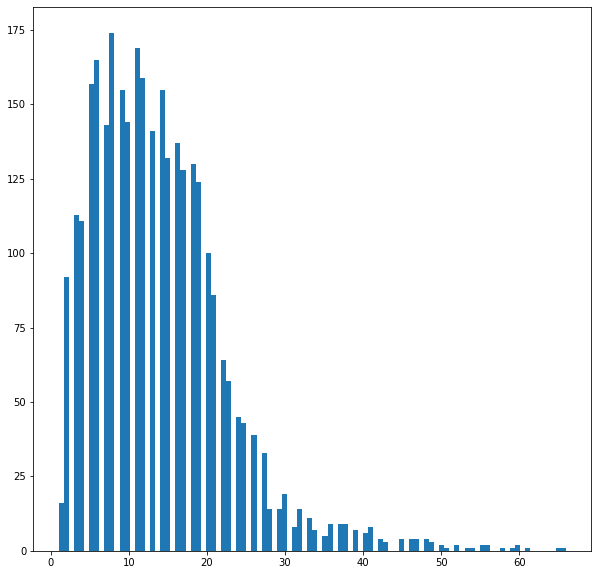

In [69]:
#Visualize
tweets_length = [ len(nltk.word_tokenize(x)) for x in df_train[4] ]
plt.figure(figsize = (10, 10)) 
plt.hist(tweets_length,bins=100)
plt.show()


# #Remove StopWords and Tokenize

In [63]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/astra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:

# Obtain additional stopwords from nltk

stop_words = stopwords.words('english')
stop_words.extend(['http','https','from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])


In [65]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result
df_train[11] = df_train[4].apply(lambda x:preprocess(x))

In [67]:
df_train[11]

0
Tweet Id                                                          [text]
1377618168705859585                          [model, deliveries, europe]
1375118425362628613    [superchargers, across, europe, locations, cou...
1374481774714126338        [fogdo, thank, tesla, helpful, cool, feature]
1371884988371771399    [backseat, views, model, loghi, instagram, htt...
                                             ...                        
478937222784098304                           [standohar, picture, great]
478936817215889408     [jasongfox, seansparkman, either, chance, sit,...
478936076833144832                       [jblood, chance, sit, one, yet]
478757282126123009     [elonmusk, edmunds, beats, tesla, lany, record...
478646221687373824     [sirrobsonp, stay, tuned, gen, iii, car, three...
Name: 11, Length: 3196, dtype: object

# split data

/home/astra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


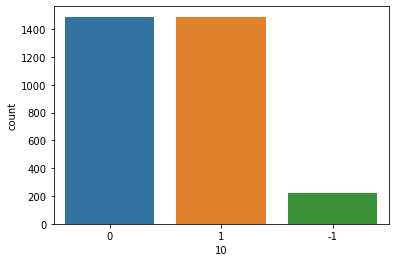

In [70]:
sns.countplot(df_train[10])

In [71]:
df_train.head(3)

1   \
0                                                                        
Tweet Id                                                          Text   
1377618168705859585  Model 3 deliveries in Europe https://t.co/fiBN...   
1375118425362628613  6,000+ Superchargers across Europe — at 600 lo...   

                           8    9   \
0                                    
Tweet Id             Retweets  0.0   
1377618168705859585      1625  0.0   
1375118425362628613      4339  0.0   

                                                                    4  10  \
0                                                                           
Tweet Id                                                          Text  0   
1377618168705859585       Model  deliveries in Europe httpstcofiBNpapG  0   
1375118425362628613   Superchargers across Europe — at  locations a...  0   

                                                                    11  
0                                                                       
Tweet Id                                                        [text]  
1377618168705859585                        [model, deliveries, europe]  
1375118425362628613  [superchargers, across, europe, locations, cou...

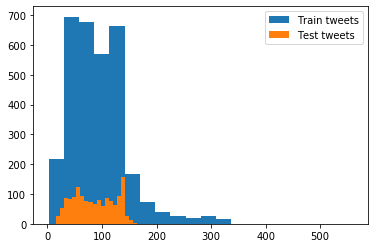

In [72]:
length_train_dataset = df_train[1].str.len()
length_test_dataset = df_test[1].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend() 
plt.show()


# create a model

In [73]:
combine=df_train.append(df_test,ignore_index=True) #train and test dataset are combined
df_train.shape
print("Train",df_train.shape,"\nTest" ,df_test.shape,"\nCombine",combine.shape)
combine.head(5)

Train (3196, 6) 
Test (1433, 18) 
Combine (4629, 18)


1    2    3   \
0                                               Text  NaN  NaN   
1  Model 3 deliveries in Europe https://t.co/fiBN...  NaN  NaN   
2  6,000+ Superchargers across Europe — at 600 lo...  NaN  NaN   
3  RT @Fogdo : Thank you @Tesla for this helpful ...  NaN  NaN   
4  Backseat views from Model Y\n\n📸 by loghi007 o...  NaN  NaN   

                                                  4    5   6   7         8   \
0                                               Text  NaN NaN NaN  Retweets   
1       Model  deliveries in Europe httpstcofiBNpapG  NaN NaN NaN      1625   
2   Superchargers across Europe — at  locations a...  NaN NaN NaN      4339   
3  RT Fogdo  Thank you Tesla for this helpful and...  NaN NaN NaN         0   
4  Backseat views from Model Y\n\n📸 by loghi on I...  NaN NaN NaN      4112   

     9  10                                                 11  12  13   14  \
0     0  0                                             [text] NaN NaN  NaN   
1     0  0                        [model, deliveries, europe] NaN NaN  NaN   
2     0  0  [superchargers, across, europe, locations, cou... NaN NaN  NaN   
3  0.35  1      [fogdo, thank, tesla, helpful, cool, feature] NaN NaN  NaN   
4     0  0  [backseat, views, model, loghi, instagram, htt... NaN NaN  NaN   

    15   16   17   18  
0  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN

In [77]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [78]:
combine[4] = np.vectorize(remove_pattern)(combine[1],"@[\w]*") 
combine[4] = combine[4].str.replace("[^a-zA-Z#]"," ")
combine[4] = combine[4].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


tokenized_tweet = combine[4].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()




0                                               [Text]
1            [Model, deliveries, Europe, https, fiBNp]
2    [Superchargers, across, Europe, locations, cou...
3    [Thank, this, helpful, cool, feature, https, F...
4    [Backseat, views, from, Model, loghi, Instagra...
Name: 4, dtype: object

In [36]:
import sklearn

In [37]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.model_selection import train_test_split
tweet = combine[4].values
polarity = combine[10].values
tweets_train, tweets_test, y_train, y_test = train_test_split(tweet, polarity, test_size=0.2, random_state=1000)

# Train model

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine[4]) # tokenize and build vocabulary
bow

<4629x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 20860 stored elements in Compressed Sparse Row format>

In [81]:

combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine[10],random_state=69,test_size=0.2)

In [82]:


print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)



X_train_shape :  (3703, 1000)
X_test_shape :  (926, 1000)
y_train_shape :  (3703,)
y_test_shape :  (926,)


In [83]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer

# NaïveBayes-BernoulliNB


In [84]:
# # Make Predictions

In [85]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)



In [86]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)

print("Accuracy with Naive-bayes: ",(score_naive)*100,"%")

Accuracy with Naive-bayes:  43.08855291576673 %


In [127]:

test_tweet= ['Geeks for Geeks', 'is', 'best computer science portal']

res = list(map(str.split, test_tweet))




print(res)
list_of_words=[]
for i in res:
    for j in i:
        list_of_words.append(j)
list_of_words
total_words = len(list(list_of_words))
list_of_words



[['Geeks', 'for', 'Geeks'], ['is'], ['best', 'computer', 'science', 'portal']]


['Geeks', 'for', 'Geeks', 'is', 'best', 'computer', 'science', 'portal']

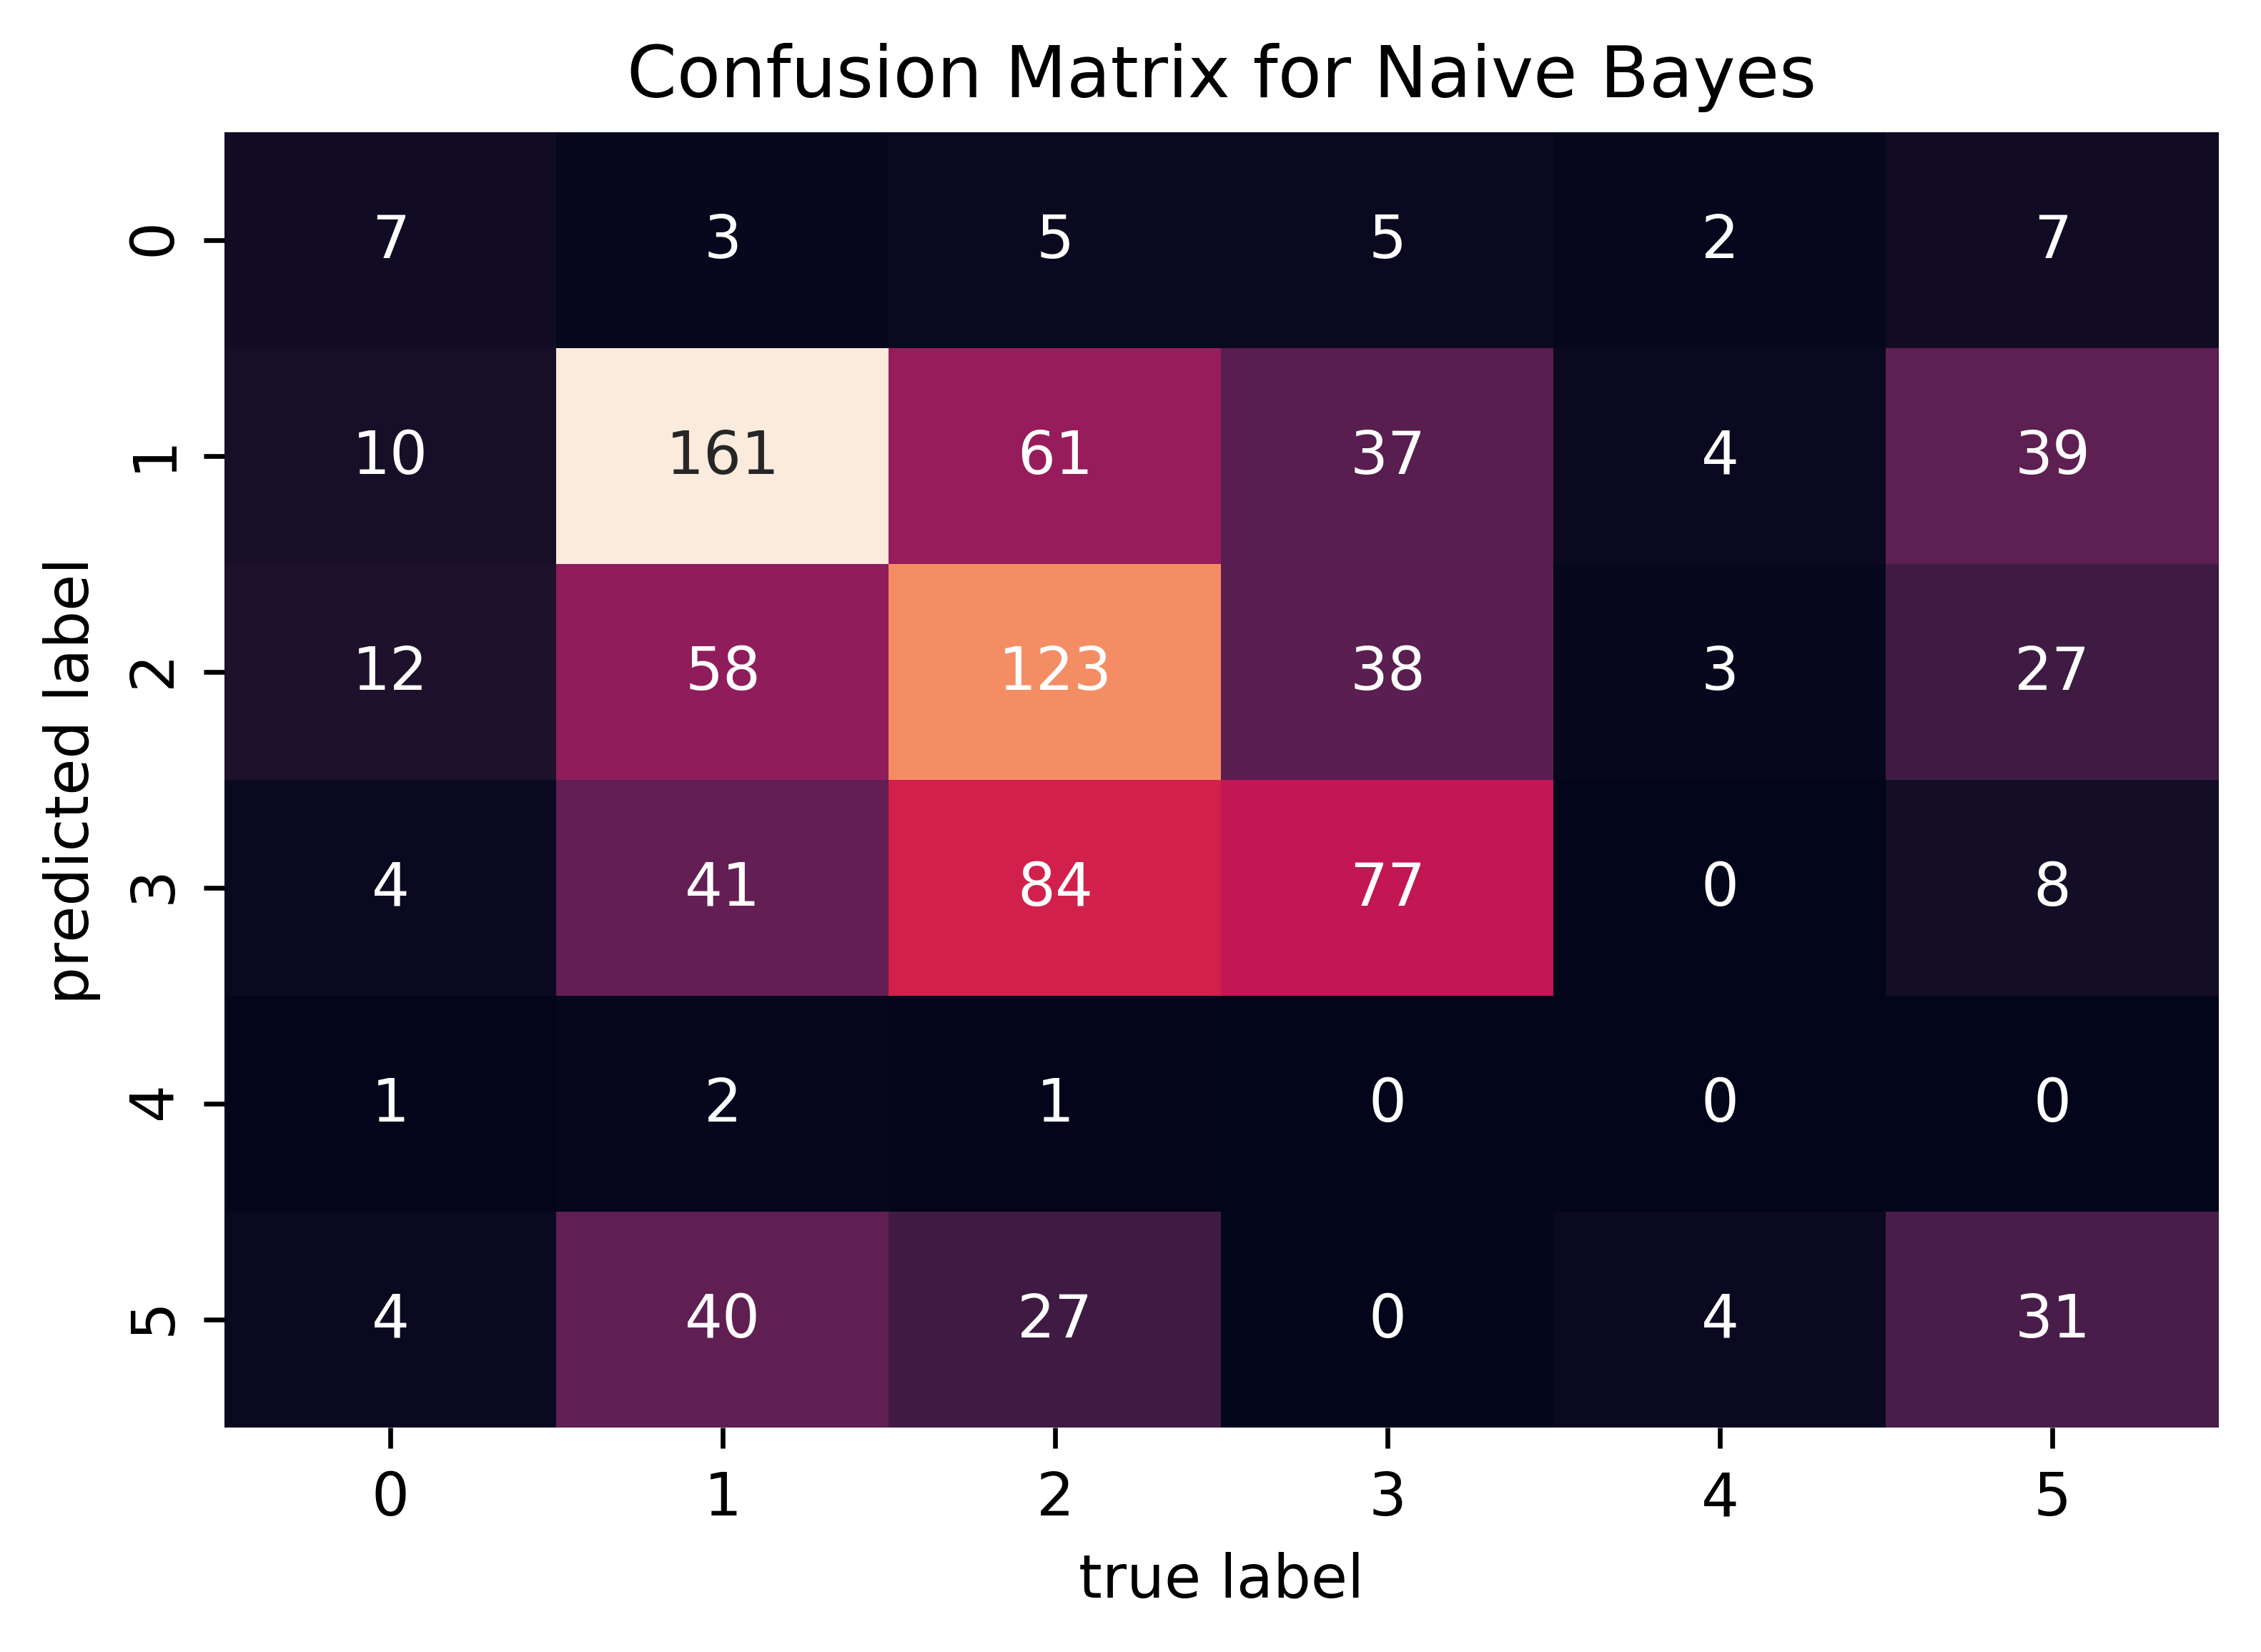

In [122]:

from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig("confusion_matrix.png")
plt.show()


# Support Vector Machine

In [248]:
clean_review = []
for i in range(4629):
    txt = re.sub('[^a-zA-Z]',' ',combine[4][i])
    txt = txt.lower()
    txt = txt.split()
#     txt = [ps.stem(word) for word in txt if not word in set(stopwords.words('english'))]
    txt = ' '.join(txt)
    clean_review.append(txt)
# print(clean_review)
# from array import array
# y=array(t)
# for i in range(4629):
#     txt = re.sub('[^0-9]',' ',combine[10][i])
    
#     y.append(txt)
y = np.array(combine[10].values.tolist())

In [249]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)
X = cv.fit_transform(clean_review)



In [250]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X = tfidf.fit_transform(X).toarray()

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state=0)

In [262]:
# occ = np.asarray(X.sum(axis=0)).ravel().tolist()
# # counts_df = pd.DataFrame({'term': cv.get_feature_names(), 'occurrences': occ})
# counts_df.sort_values(by='occurrences', ascending=False).head(10)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (3240, 500)
Shape of y_train: (3240,)
Shape of X_test: (1389, 500)
Shape of y_test: (1389,)


In [263]:
from sklearn import svm
clf = svm.SVC().fit(X_train, y_train)

precision = clf.predict(X_test)


In [264]:
y_pred = clf.predict(X_test)

# print("Precision Score : ",precision)
# print("Recall Score : ",clf(y_test, y_pred, pos_label='positive', average='micro'))


In [266]:
from sklearn.metrics import f1_score
score=f1_score(y_test, y_pred,pos_label='positive', average='micro')
print(score*100,"%")



45.28437724982001 %


/home/astra/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [268]:


score_svm = accuracy_score(precision, y_test)

print("Accuracy with Naive-bayes: ",(score_svm)*100,"%")



Accuracy with Naive-bayes:  45.28437724982001 %


# Logistic Regression

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [295]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (2314, 500)
Shape of y_train: (2314,)
Shape of X_test: (2315, 500)
Shape of y_test: (2315,)


In [296]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [297]:
logreg = logreg.fit(X_train, y_train)

In [298]:
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

# Accurracy of whole dataset

In [299]:
score=logreg.score(X,y)
print(score*100,"%")

57.39900626485201 %


# Accuracy Score on Train DataSet (r2 value)

In [300]:
acc=logreg.score(X_train,y_train)
print(acc*100,"%")

65.68712186689714 %


# Accuracy Score on Whole DataSet (r2 value)

In [302]:
whole_dt_score=logreg.score(X_test,y_test)
print(whole_dt_score*100,"%")


49.114470842332615 %


(138, 138)